# 数据探索性分析主要为后续特征工程、策略制定提供方向性指引，具体包括以下几方面工作：

## 数据基础性探索

### 1.正负样本比例分布概览；（特征工程——样本不均衡问题处理）

### 2.特征的缺失与异常值状态概览；（特征工程——缺失值与异常值处理）

### 3.筛选无法识别的特征类型（如非数值/日期类特征）；（特征工程——特征转化）

### 4.特征相关性概览（特征工程——特征筛选）

## 数据趋势性探索

### 1.vintage分析(业务洞察-了解不同维度下信贷质量差异)

### 2.滚动率分析（业务洞察-了解资产恶化规律）

### 3.逾期趋势分析（业务洞察-了解不同逾期状态的变化规律）


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
#样本不均衡问题初步排查函数
def analysis_sample(df,y_columns):  #df为数据集，y_columns为标签
    y1 = df[df[y_columns]==1].shape[0]
    y0 = df[df[y_columns]==0].shape[0]

    #绘制饼图直观表达比例
    data = [y1, y0] # 每个部分的数量
    labels = ['y1', 'y0'] # 每个部分对应的标签
    colors = ['red', 'green']  # 每个部分的颜色
    plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%')
    plt.show()
    
    if y0/y1 > 3 or y1/y0 > 3:
        return "样本不均衡问题较为明显，后续需进行样本处理"
    else:
        return "暂未发现明显的样本不均衡问题"


In [3]:
def Missing_Abnormal(df):
    #缺失值计算
    df_mid_miss = pd.DataFrame(df_train.isnull().sum().sort_values(ascending = False)).reset_index(drop = False).rename(columns = {"index":"特征",0:"缺失值"})
    #异常值计算（此处使用四分位距作为异常值的初步判断）
    df_mid_Abnormal = pd.DataFrame(columns = ["特征","异常值"])
    for each in df.columns:
        if str(df[each].dtypes)!= "object":
#             print(each)
            df_mid_Abnormal.loc[df_mid_Abnormal.shape[0]] = [each,quartile_Abnormal(df,each)]
    return pd.merge(df_mid_miss,df_mid_Abnormal,on = "特征",how = "outer")

In [4]:
def quartile_Abnormal(df,columns): #四分位距计算
    mid_count = df[df[columns].isnull()==False].shape[0]
    if mid_count > 200:
#         print(1)
#         print(columns)
        df_mid = df[df[columns].isnull()==False][[columns]].sort_values(by = columns,ascending = True).copy() #数据排序（升序）
        
        if mid_count%4==0:
            mid_1=(df_mid[columns].iloc[int(mid_count/4-1)]+df_mid[columns].iloc[int(mid_count/4)])/2  #下四分位数（偶数）

        else:
            mid_1=df_mid[columns].iloc[math.ceil(mid_count/4-1)]  #下四分位数（奇数）

        if mid_count%4==0:
            mid_2=(df_mid[columns].iloc[int(3*mid_count/4-1)]+df_mid[columns].iloc[int(3*mid_count/4)])/2  #上四分位数（偶数）

        else:
            mid_2=df_mid[columns].iloc[math.ceil(3*mid_count/4-1)]  #上四分位数（奇数）

        IQR=mid_2-mid_1
        IQR_1=mid_1-3*IQR  #下限   #(按照资料，应该是1.5倍，此处我们在排查时先保守一些)
        IQR_2=mid_2+3*IQR  #上限
        return df[columns][(df[columns] < IQR_1)|(df[columns] > IQR_2)].shape[0]
    else:
        return 0

In [5]:
def bar_overview(df_mid):  # 结果柱形图形式概览，df_mid为数据源表
    
    features = df_mid.shape[0]
    data1 = np.array(df_mid["缺失值"].to_list())
    data2 = np.array(df_mid["异常值"].to_list())

    features = df_mid["特征"].to_list()

    xpos = np.arange(len(data1))

    # 创建图形,设置大小
    plt.figure(figsize=(12, 8)) 

    # 柱子总宽度
    total_width = 0.8
    n = 2 
    # 单个柱子宽度
    width = total_width / n
    x = xpos - (total_width - width) / 2

    # 绘制双柱状图
    plt.bar(x, data1, width=width, label='miss')
    plt.bar(x + width, data2, width=width, label='abnormal')





    # ...绘制柱状图代码

    plt.xticks(xpos, features, rotation=90)


    # 设置坐标轴属性
    plt.xticks(rotation=90)
    plt.legend()
    plt.xlabel('Feature')
    plt.ylabel('Value')
    plt.title('Data overview')

    # 自动调整子图布局
    plt.tight_layout()  

    plt.show()   

In [6]:
#数据读取
df_train = pd.read_csv(r"C:\Users\17738\贷款违约率预测\数据集\train.csv")
df_test = pd.read_csv(r"C:\Users\17738\贷款违约率预测\数据集\testA.csv")

# 数据基础性探索

## 1 数据整体概览

In [7]:
#训练集数据整体概览
print(df_train.info())
print(df_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

In [8]:
#测试集数据整体概览
print(df_test.info())
print(df_test.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 46 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  200000 non-null  int64  
 1   loanAmnt            200000 non-null  float64
 2   term                200000 non-null  int64  
 3   interestRate        200000 non-null  float64
 4   installment         200000 non-null  float64
 5   grade               200000 non-null  object 
 6   subGrade            200000 non-null  object 
 7   employmentTitle     200000 non-null  float64
 8   employmentLength    188258 non-null  object 
 9   homeOwnership       200000 non-null  int64  
 10  annualIncome        200000 non-null  float64
 11  verificationStatus  200000 non-null  int64  
 12  issueDate           200000 non-null  object 
 13  purpose             200000 non-null  int64  
 14  postCode            200000 non-null  float64
 15  regionCode          200000 non-nul

## 2 正负样本比例分布概览

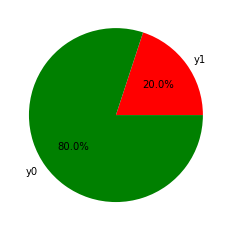

'样本不均衡问题较为明显，后续需进行样本处理'

In [9]:
analysis_sample(df_train,"isDefault")

## 3 特征的缺失与异常值状态概览

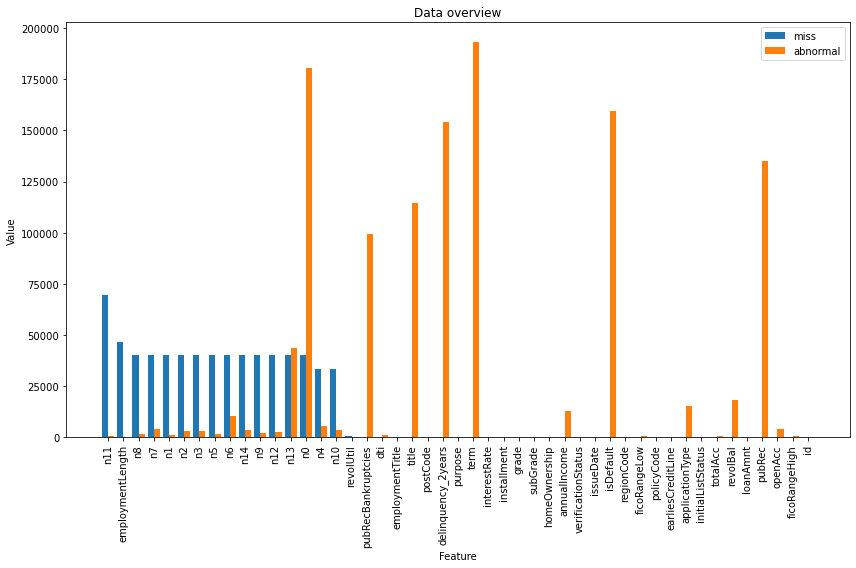

,特征,缺失值,异常值
0,n11,69752,566.0
1,employmentLength,46799,NaN
2,n8,40271,1885.0
3,n7,40270,4303.0
4,n1,40270,1371.0
5,n2,40270,2980.0
6,n3,40270,2980.0
7,n5,40270,1755.0
8,n6,40270,10692.0
9,n14,40270,3522.0


In [10]:
df_mid = Missing_Abnormal(df_train)   #调用函数计算每个特征缺失值与异常值的数值
bar_overview(df_mid)  #图形化概览
df_mid #直接表格概览

## 4 筛选无法识别的特征类型（如非数值/日期类特征）

In [11]:
for each in df_train.columns:
    if str(df_train[each].dtypes)!= "float64" and str(df_train[each].dtypes)!= "int64":
        print(each,str(df_train[each].dtypes))

grade object
subGrade object
employmentLength object
issueDate object
earliesCreditLine object


In [12]:
df_train.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')

## 5 特征相关性概览

In [13]:
data = df_train

# 计算相关性
correlations = data.corr()

# 只显示与因变量相关的
corrs_with_y = correlations['isDefault'].sort_values(ascending=False)

print(corrs_with_y)

isDefault             1.000000
interestRate          0.259202
term                  0.175126
verificationStatus    0.088557
n14                   0.085715
dti                   0.084961
n3                    0.070352
n2                    0.070352
n9                    0.068978
loanAmnt              0.065210
revolUtil             0.059451
homeOwnership         0.054599
installment           0.051524
n1                    0.040659
n7                    0.032007
openAcc               0.026867
pubRec                0.026558
pubRecBankruptcies    0.026038
n10                   0.025583
delinquency_2years    0.020185
applicationType       0.018197
n4                    0.013156
n0                    0.010953
n13                   0.010101
postCode              0.007140
n6                    0.005350
n12                   0.003287
regionCode            0.002822
n11                  -0.000293
id                   -0.000351
n8                   -0.005951
initialListStatus    -0.007383
totalAcc

# 数据趋势性探索

## 1 vintage分析(业务洞察-了解不同条件下信贷质量差异)

In [71]:
# 数据格式处理
df_train['issueDate'] = pd.to_datetime(df_train['issueDate'])

df_mid1_3 = df_train[df_train["term"]==3].groupby('issueDate').agg({'isDefault': ['count', 'sum']}).copy()
df_mid1_3["Default_rate"] = df_mid1_3[("isDefault","sum")]/df_mid1_3[("isDefault","count")]

df_mid1_5 = df_train[df_train["term"]==5].groupby('issueDate').agg({'isDefault': ['count', 'sum']}).copy()
df_mid1_5["Default_rate"] = df_mid1_5[("isDefault","sum")]/df_mid1_5[("isDefault","count")]

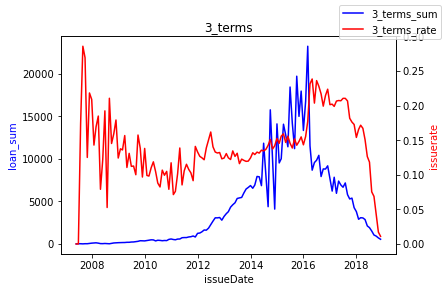

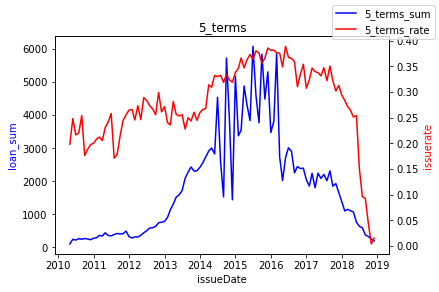

In [69]:
#三年贷折线图
x = df_mid1_3.index
y1 = df_mid1_3[("isDefault","count")].to_list()
y2 = df_mid1_3["Default_rate"].to_list()

fig, ax1 = plt.subplots()

ax1.plot(x, y1, 'b-', label='3_terms_sum')
ax1.set_xlabel('issueDate')
ax1.set_ylabel('loan_sum', color='b')

ax2 = ax1.twinx() 
ax2.plot(x, y2, 'r-', label='3_terms_rate')
ax2.set_ylabel('issuerate', color='r')

plt.title('3_terms')

# 增加数据标签
# for i,j in zip(x,y1):
#     ax1.annotate(str(j),xy=(i,j))

fig.legend()

plt.show()


#五年贷折线图
x = df_mid1_5.index
y1 = df_mid1_5[("isDefault","count")].to_list()
y2 = df_mid1_5["Default_rate"].to_list()

fig, ax1 = plt.subplots()

ax1.plot(x, y1, 'b-', label='5_terms_sum')
ax1.set_xlabel('issueDate')
ax1.set_ylabel('loan_sum', color='b')

ax2 = ax1.twinx() 
ax2.plot(x, y2, 'r-', label='5_terms_rate')
ax2.set_ylabel('issuerate', color='r')

plt.title('5_terms')

# 增加数据标签
# for i,j in zip(x,y1):
#     ax1.annotate(str(j),xy=(i,j))

fig.legend()
plt.show()

# df_mid1_3.to_csv(r"C:\Users\17738\贷款违约率预测\数据集\3年贷vintage分析数据.csv")
# df_mid1_5.to_csv(r"C:\Users\17738\贷款违约率预测\数据集\5年贷vintage分析数据.csv")

1.不同时期段的Vintage表现可以反映当时经济和就业环境，应该根据它的波动对应调整信贷策略,而不盲目追求规模扩张导致违约风险加大。

2.后期的高违约率信号可能预示经济衰退和就业下滑，企业应提高警惕,准备应对措施。

3.5年期贷款信息可以为3年期提供先行监测作用。从数据来看,5年期贷款的违约率变化大致会领先3年期6-12个月，所以监测5年期贷款的最新违约情况,可以让银行提前发现问题,并采取措施管理3年期新的贷款。

## 2 滚动率分析（业务洞察-了解资产恶化规律）

滚动率分析一般用来辅助定义正负样本，此场景下正负样本已定义，滚动率用来分析有不同程度违约记录的用户后期的违约状态规律，结论将作为后期策略修正的参考；

In [110]:
df_mid1_delinquency_2years = df_train.groupby('delinquency_2years').agg({'isDefault': ['count', 'sum']}).copy()
df_mid1_delinquency_2years["Default_rate"] = df_mid1_delinquency_2years[("isDefault","sum")]/df_mid1_delinquency_2years[("isDefault","count")]

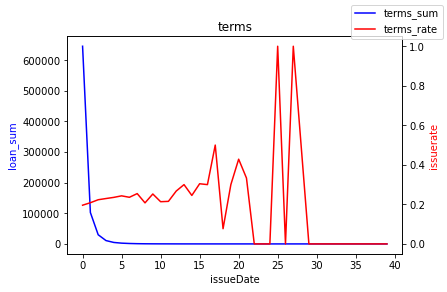

In [113]:
x = df_mid1_delinquency_2years.index
y1 = df_mid1_delinquency_2years[("isDefault","count")].to_list()
y2 = df_mid1_delinquency_2years["Default_rate"].to_list()

fig, ax1 = plt.subplots()

ax1.plot(x, y1, 'b-', label='terms_sum')
ax1.set_xlabel('issueDate')
ax1.set_ylabel('loan_sum', color='b')

ax2 = ax1.twinx() 
ax2.plot(x, y2, 'r-', label='terms_rate')
ax2.set_ylabel('issuerate', color='r')

plt.title('terms')

# 增加数据标签
# for i,j in zip(x,y1):
#     ax1.annotate(str(j),xy=(i,j))

fig.legend()

plt.show()

历史违约行为与当次贷款是否违约呈明显的正相关状态

## 3 逾期趋势分析（业务洞察-了解不同逾期状态的变化规律）

此场景下无法区分不同逾期的状态，逾期趋势分析用来分析不同贷款等级对逾期率的影响，结论将作为后期策略修正的参考；

In [105]:
# 数据格式处理
df_mid1_grade = df_train.groupby('grade').agg({'isDefault': ['count', 'sum']}).copy()
df_mid1_grade["Default_rate"] = df_mid1_grade[("isDefault","sum")]/df_mid1_grade[("isDefault","count")]

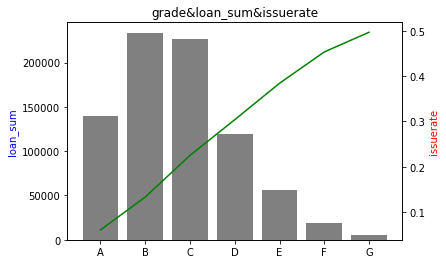

In [106]:
x = df_mid1_grade.index
y1 = df_mid1_grade[("isDefault","count")].to_list()
y2 = df_mid1_grade["Default_rate"].to_list()

fig, ax1 = plt.subplots()

ax1.bar(x, y1,color='gray')
ax1.set_ylabel('loan_sum', color='b') 

ax2 = ax1.twinx()  
ax2.plot(x, y2, color='g')
ax2.set_ylabel('issuerate', color='r')

plt.title('grade&loan_sum&issuerate')
plt.show()

贷款等级越低，贷款单越少，违约率越高；

In [2]:
#测试信息